In [ ]:
#=================
# Este proyecto tiene como objetivo explorar los factores que influyen en el éxito de las canciones más reproducidas en Spotify a partir de un análisis visual y numérico.
# Para ello, se trabaja con dos datasets: uno con información de las canciones más reproducidas (streams, nombre, artista, año)
# y otro con la clasificación de cada canción según su género musical.

# El análisis se centra en descubrir si ciertos géneros musicales dominan en la plataforma, si la duración o popularidad de las canciones se relacionan con el número de
# reproducciones y si hay patrones temporales que expliquen el éxito de ciertos estilos. Se parte de hipótesis como:
# “los géneros más comerciales tienen más reproducciones” o “las canciones más cortas tienen mayor rotación”.

# A través de visualizaciones univariadas, bivariadas y multivariadas, y acompañados de estadísticas descriptivas, se busca validar o refutar estas hipótesis.
# También se identifican valores perdidos que puedan afectar el análisis. Esta entrega representa la primera etapa de un análisis integral que se desarrollará en etapas futuras.
#=================



#=================
# Preguntas:
# 1. ¿Qué géneros musicales acumulan más streams?
# 2. ¿Existe relación entre la duración de una canción y su cantidad de streams?
# 3. ¿La popularidad asignada por Spotify se alinea con los géneros más escuchados?

# Hipótesis:
# Las canciones de géneros comerciales como Pop o Reggaetón dominan en streams.
# Canciones más cortas tienen mayor cantidad de reproducciones.
# Géneros populares presentan mayor popularidad promedio en la plataforma.
#=================



#=================
# Importacion de Archivos y Librerias

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import random
import numpy as np

# Montar Google Drive
drive.mount("/content/drive")

# Leer archivo principal (SpotifySongs.xlsx)
file_path = "/content/drive/MyDrive/SpotifySongs.xlsx"
df_spotify = pd.read_excel(file_path)

# Leer archivo secundario (Genres.xlsx con track_genre de SpotifySongs)
file_path_2 = "/content/drive/MyDrive/Genres.xlsx"
df_genres = pd.read_excel(file_path_2)

# Combinar por 'track_name' para agregar columnas 'track_genre' y 'duration_ms' de Genres.xlsx
df_merged = pd.merge(df_spotify, df_genres[['track_name', 'track_genre', 'duration_ms']], on='track_name', how='left')
#=================




#=================
# Convertir la columna 'streams' a numérica, forzando errores a NaN
df_merged['streams'] = pd.to_numeric(df_merged['streams'], errors='coerce')

# Eliminar filas donde 'streams' no pudo convertirse
df_merged = df_merged.dropna(subset=['streams'])

# Identificación de valores perdidos
print("\nValores nulos por columna:")
print(df_merged.isnull().sum())
#=================


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Valores nulos por columna:
track_name                0
artist                    0
artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts         0
streams                   0
in_apple_playlists        0
in_apple_charts           0
in_deezer_playlists       0
in_deezer_charts          0
in_shazam_charts        331
bpm                       0
key                     218
mode                      1
danceability_%            1
valence_%                 0
energy_%                  0
acousticness_%            0
instrumentalness_%        0
liveness_%                0
speechiness_%             0
track_genre             619
duration_ms             619
dtype: int64


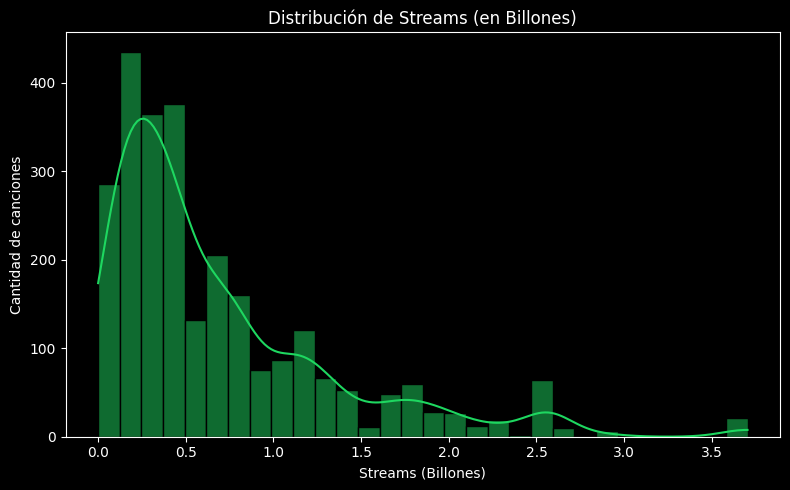

In [ ]:
#=================
# ANALISIS UNIVARIADO: Distribución de Streams


# Estilo con fondo negro y letras blancas
plt.style.use('dark_background')

# Crear gráfico
plt.figure(figsize=(8, 5))
sns.histplot(df_merged['streams'] / 1e9, bins=30, kde=True, color='#1ed760', edgecolor='black')

plt.title('Distribución de Streams (en Billones)', color='white')
plt.xlabel('Streams (Billones)', color='white')
plt.ylabel('Cantidad de canciones', color='white')

# Cambiar color de los ticks (valores de los ejes)
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()
#=================

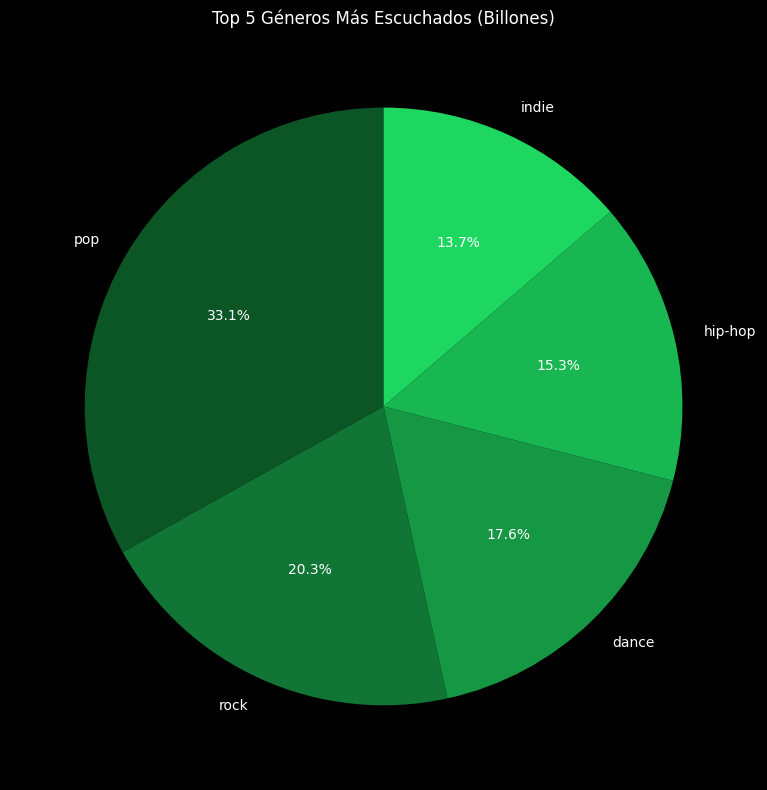

In [ ]:
#=================
# ANALISIS BIVARIADO: Streams por Genero

# Fondo negro
plt.style.use('dark_background')

# Calcular los 5 géneros con más streams
top_5_genres = df_merged.groupby('track_genre')['streams'].sum().sort_values(ascending=False).head(5)

# Definir variables necesarias para el gráfico
top_5 = top_5_genres.values / 1e9  # Convertir a billones
labels = top_5_genres.index.tolist()

# Función para generar tonos del color base
def generate_shades(hex_color, n):
    base = mcolors.to_rgb(hex_color)
    # Tonos de claro (i=0) a oscuro (i=n-1)
    shades = [tuple(np.clip(np.array(base) * (1 - 0.15 * i), 0, 1)) for i in range(n)]
    return shades

# Generar tonos e invertir para que el más oscuro esté primero
colors = generate_shades('#1ed760', len(top_5))[::-1]

# Crear gráfico
plt.figure(figsize=(8, 8))
plt.pie(
    top_5,
    labels=labels,
    colors=colors,
    startangle=90,
    autopct='%.1f%%',
    textprops={'color': 'white'}
)

plt.title("Top 5 Géneros Más Escuchados (Billones)", color='white')
plt.tight_layout()
plt.show()
#=================

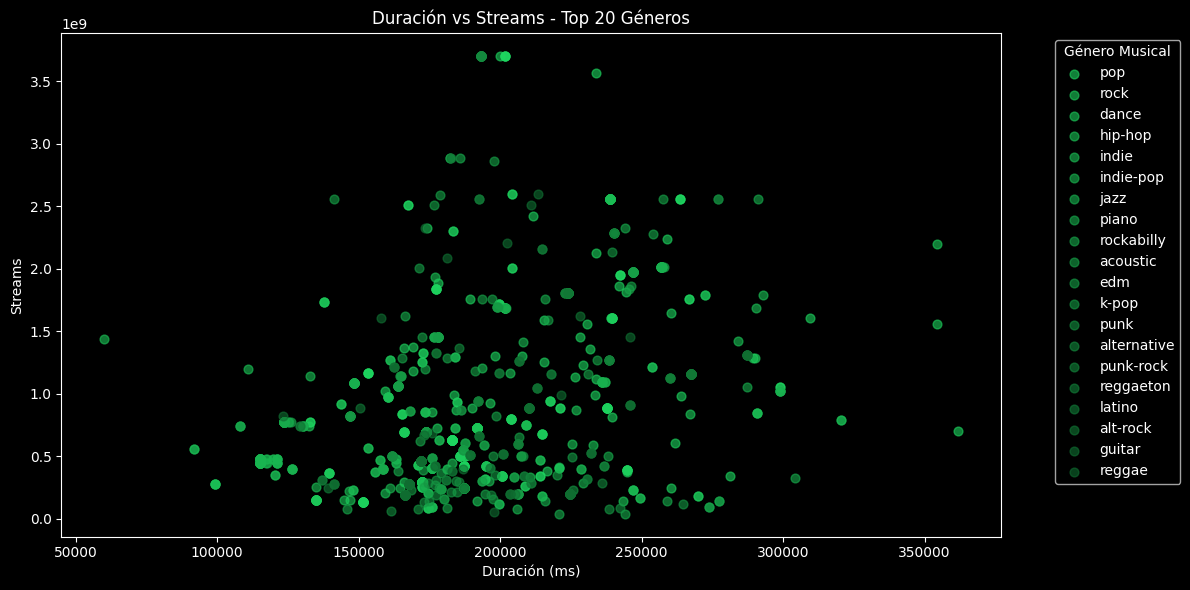

In [ ]:
#=================
# ANALISIS MULTIVARIADO: Streams vs Duración vs Género


# Calcular los 20 géneros con más streams
genre_streams = df_merged.groupby('track_genre')['streams'].sum().sort_values(ascending=False)
top_20_genres = genre_streams.head(20).index.tolist()

# Crear escala de verdes (claro = más streams, oscuro = menos)
base_green = mcolors.to_rgb('#1ed760')
num_colors = len(top_20_genres)

# Generar degradado de verde (claro a oscuro)
green_shades = [
    tuple(np.clip(np.array(base_green) * (1 - 0.5 * (i / (num_colors - 1))), 0, 1))  # de 1.0 a 0.5
    for i in range(num_colors)
]
green_hex_shades = [mcolors.to_hex(shade) for shade in green_shades]

# Asignar colores a géneros según orden descendente de streams
color_mapping = {genre: color for genre, color in zip(top_20_genres, green_hex_shades)}

# Filtrar el dataframe solo con los 20 géneros
df_top20 = df_merged[df_merged['track_genre'].isin(top_20_genres)]

# Crear gráfico
plt.figure(figsize=(12, 6))
for genre in top_20_genres:
    genre_data = df_top20[df_top20['track_genre'] == genre]
    plt.scatter(
        genre_data['duration_ms'],
        genre_data['streams'],
        color=color_mapping[genre],
        label=genre,
        alpha=0.6,
        s=40)

plt.title("Duración vs Streams - Top 20 Géneros")
plt.xlabel("Duración (ms)")
plt.ylabel("Streams")
plt.legend(title="Género Musical", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#=================

🔮 Top 10 géneros proyectados más escuchados (2025–2035):
k-pop        7.328356e+11
hip-hop      1.885228e+11
pop          1.839028e+11
reggaeton    1.441328e+11
indie        1.138237e+11
punk-rock    9.503351e+10
reggae       9.432575e+10
dance        9.159125e+10
rock         9.010411e+10
indie-pop    8.550951e+10
dtype: float64


/tmp/ipython-input-37-3878443483.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


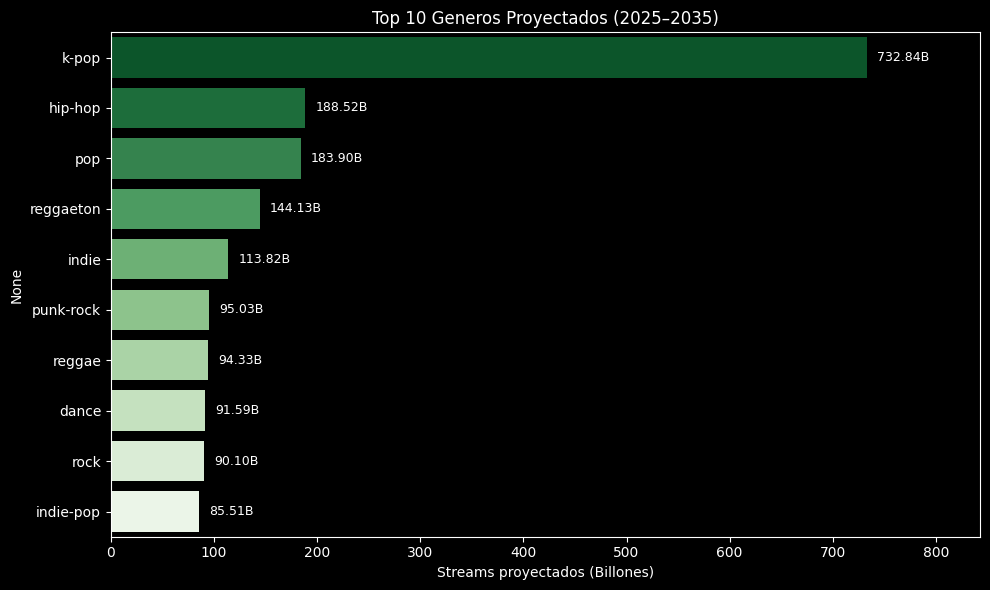

In [ ]:
from sklearn.linear_model import LinearRegression

#===============================
# ETAPA 1: PREPROCESAMIENTO Y AGRUPACIÓN DE DATOS
#===============================

# Asegurar que 'released_year' sea numérico
df_merged['released_year'] = pd.to_numeric(df_merged['released_year'], errors='coerce')

# Eliminar filas con valores faltantes importantes
df_merged = df_merged.dropna(subset=['track_genre', 'streams', 'released_year'])

# Agrupar por género y año
genre_year = df_merged.groupby(['track_genre', 'released_year'])['streams'].sum().reset_index()

#===============================
# ETAPA 2: PROYECCIÓN DE STREAMS A FUTURO (2025–2035)
#===============================

future_years = list(range(2025, 2036))  # Años para proyectar
genre_predictions = {}

for genre in genre_year['track_genre'].unique():
    df_genre = genre_year[genre_year['track_genre'] == genre]

    if len(df_genre) >= 3:
        X = df_genre[['released_year']]
        y = df_genre['streams']

        model = LinearRegression()
        model.fit(X, y)

        future_X = pd.DataFrame({'released_year': future_years})
        future_streams = model.predict(future_X)

        genre_predictions[genre] = future_streams.sum()

#===============================
# ETAPA 3: RESULTADOS Y VISUALIZACIÓN
#===============================

# Crear ranking de géneros proyectados
top_10_future_genres = pd.Series(genre_predictions).sort_values(ascending=False).head(10)

# Mostrar por consola
print("🔮 Top 10 géneros proyectados más escuchados (2025–2035):")
print(top_10_future_genres)

# Visualización
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x=top_10_future_genres.values / 1e9,  # en billones
    y=top_10_future_genres.index,
    palette='Greens_r'
    )

# Agregar etiquetas con los valores proyectados
for i, (value, genre) in enumerate(zip(top_10_future_genres.values, top_10_future_genres.index)):
    plt.text(
        x=value / 1e9 + 10,  # posición ajustada a la derecha
        y=i,
        s=f"{value / 1e9:.2f}B",
        va='center',
        ha='left',
        fontsize=9,
        color='white'
        )

# Ajustar el límite del eje X para evitar que se corte la etiqueta más larga
plt.xlim(0, (top_10_future_genres.values.max() / 1e9) * 1.15)

plt.xlabel("Streams proyectados (Billones)")
plt.title("Top 10 Generos Proyectados (2025–2035)")
plt.tight_layout()
plt.show()
#===============================

In [ ]:
#===============================
# ETAPA 4: CONCLUSIONES

# El analisis muestra que el genero que se consolidara con mas reproducciones en la proxima decada sera el K-Pop,
# seguido por Hip Hop, Pop, Reggaeton y demas...
#===============================